In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
case = 'Nepal'
output_folder = "Simulation-results"

In [3]:
with open('{}/{}/python_objects.pickle'.format(case, output_folder),
          'rb') as handle:
    global_label_tree, EMA_model_dict, global_dfs_var_unc_data, global_fixed_unc, global_policy_tree = pickle.load(
        handle)

In [4]:
from ema_workbench import load_results
import ema_workbench.analysis.prim as prim

from ema_workbench import ema_logging
# from ema_workbench.em_framework.

ema_logging.log_to_stderr(ema_logging.INFO)

import matplotlib.pyplot as plt
# %matplotlib notebook
import random

C:\Users\timro\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [5]:
random.choice(global_label_tree['p3'])

'p0n0p1n6p2n43p3n265'

In [6]:
results = load_results("{}/{}/p0n0p1n1p2n7p3n46.tar.gz".format(case,output_folder))
# results = load_results("{}/{}/p0n0p1n3p2n20p3n131.tar.gz".format(case,output_folder))

[MainProcess/INFO] results loaded succesfully from C:\Users\timro\Dropbox\MSc EPA\0 Master Thesis\Python Files\Thesis\Final\Nepal\Simulation-results\p0n0p1n1p2n7p3n46.tar.gz


In [7]:
results[1].keys()

dict_keys(['total_costs', 'nr_uncovered_DPs', 'total_uncovered_demand', 'max_distr_time'])

In [10]:
%matplotlib notebook

## Costs

In [11]:
def classify_totcosts(data):
    #get the output 
    result = data['total_costs']
    #get threshold worst 20%, assuming minimisation
    worst_20 = np.percentile(result, 80)
    
    #make an empty array of length equal to number of cases 
    classes =  np.zeros(result.shape[0])
    
    #if higher than threshold of worst 20%
    classes[result[:] > worst_20] = 1
    
    return classes

In [12]:
prim_obj = prim.setup_prim(results, classify_totcosts, threshold=0.8)

box1 = prim_obj.find_box()

[MainProcess/INFO] 2500 points remaining, containing 500 cases of interest
C:\Users\timro\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
[MainProcess/INFO] mean: 1.0, mass: 0.084, coverage: 0.42, density: 1.0 restricted_dimensions: 14


<IPython.core.display.Javascript object>


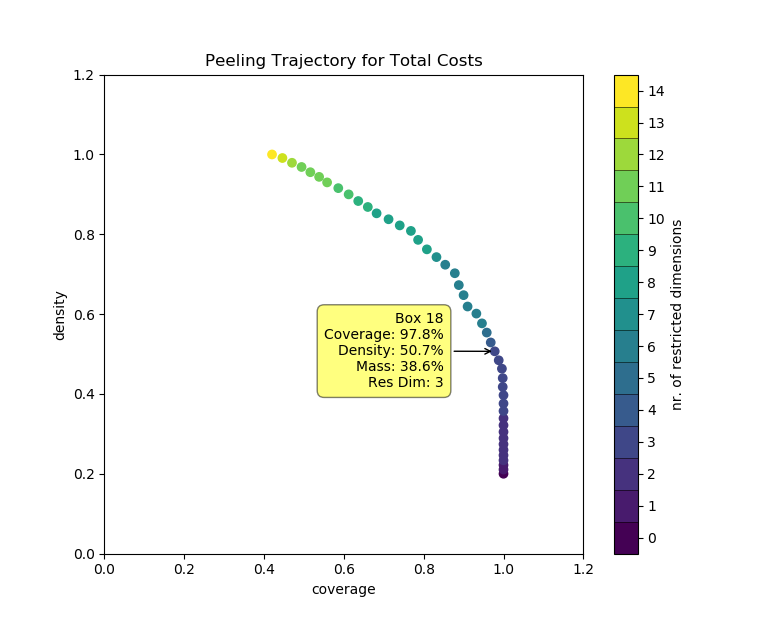

In [13]:
box1.show_tradeoff()
plt.title("Peeling Trajectory for Total Costs")
# plt.savefig("{}/Analysis/ScenDisc/Peeling_Traj_TTC".format(case),dpi=400,bbox_inches='tight')
plt.show()


coverage       0.978
density     0.506736
mass           0.386
mean        0.506736
res dim            3
Name: 18, dtype: object

                       box 18                                     
                          min        max                 qp values
demand_per_affected  8.709369  14.999509   [6.735960404043089e-35]
FL_range             1.939764   4.992311     [8.2314865133733e-14]
unit_transport_cost  8.418548  14.984401  [1.0896527829520132e-10]



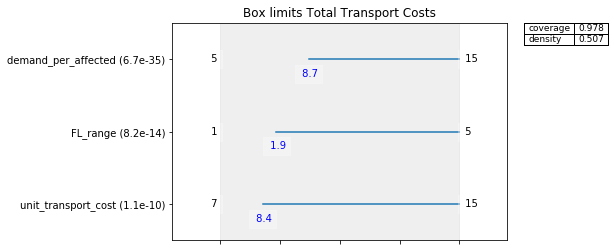

In [69]:
box1.inspect(18)
box1.inspect(18, style="graph", )

plt.title("Box limits Total Transport Costs")
# plt.tight_layout()
plt.savefig("{}/Analysis/ScenDisc/Box_Lim_TTC".format(case,output_folder),dpi=400,bbox_inches='tight')
plt.show()


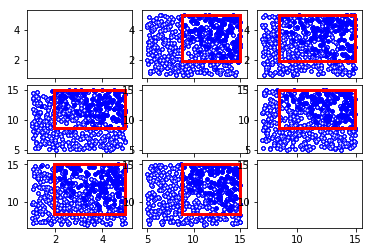

In [70]:
box1.select(18)
fig = box1.show_pairs_scatter()
# fig.set_size_inches((12,12))
# plt.tight_layout()
plt.show()

In [71]:
box2 = prim_obj.find_box()

[MainProcess/INFO] 1535 points remaining, containing 11 cases of interest
C:\Users\timro\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
[MainProcess/INFO] box does not meet threshold criteria, value is 0.08461538461538462, returning dump box


In [72]:
print (prim_obj.stats_to_dataframe())
print (prim_obj.boxes_to_dataframe())

       coverage   density   mass  res_dim
box 1     0.978  0.506736  0.386        3
box 2     0.022  0.007166  0.614        0
                       box 1             box 2         
                         min      max      min      max
demand_per_affected  8.70937  14.9995  5.00287  14.9995
FL_range             1.93976  4.99231  1.00343  4.99231
unit_transport_cost  8.41855  14.9844  7.00539  14.9844


## Travel Time

In [14]:
def classify_max_trav_t(data):
    #get the output 
    result = data['max_distr_time']
    #get threshold worst 20%, assuming minimisation
    worst_20 = np.percentile(result, 80)
    
    #make an empty array of length equal to number of cases 
    classes =  np.zeros(result.shape[0])
    
    #if higher than threshold of worst 20%
    classes[result[:] > worst_20] = 1
    
    return classes

In [15]:
prim_obj = prim.setup_prim(results, classify_max_trav_t, threshold=0.8)

box1 = prim_obj.find_box()

[MainProcess/INFO] 2500 points remaining, containing 500 cases of interest
C:\Users\timro\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
[MainProcess/INFO] mean: 1.0, mass: 0.2, coverage: 1.0, density: 1.0 restricted_dimensions: 2


<IPython.core.display.Javascript object>


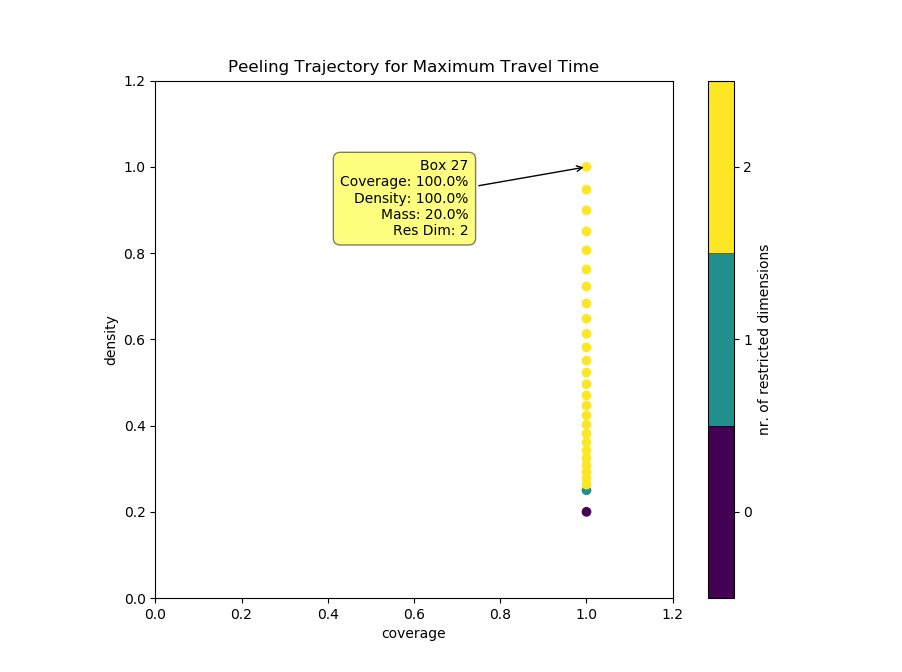

In [16]:
# box1.show_ppt()
# plt.show()

box1.show_tradeoff()
plt.title("Peeling Trajectory for Maximum Travel Time")
# plt.savefig("{}/Analysis/ScenDisc/Peeling_Traj_MTT".format(case),dpi=400,bbox_inches='tight')

plt.show()

coverage      1
density       1
mass        0.2
mean          1
res dim       2
Name: 27, dtype: object

                 box 27                                          
                    min             max                 qp values
DSRDP34         1.55118         1.68375  [9.332636185031767e-302]
policy   {8, 10, 11, 6}  {8, 10, 11, 6}  [3.5074662110431985e-49]



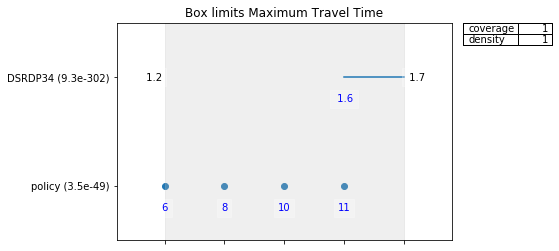

In [77]:
box1.inspect(27)
box1.inspect(27, style="graph")
# box1.inspect(39)
# box1.inspect(39, style="graph")
plt.title("Box limits Maximum Travel Time")
plt.savefig("{}/Analysis/ScenDisc/Box_Lim_MTT".format(case,output_folder),dpi=400,bbox_inches='tight')
plt.show()


In [78]:
print("doesnt work because the input is a policy set")
box1.select(39)
fig = box1.show_pairs_scatter()
# fig.set_size_inches((12,12))
# plt.tight_layout()
plt.show()

doesnt work because the input is a policy set


IndexError: list index out of range

In [79]:
box2 = prim_obj.find_box()

[MainProcess/INFO] 2000 points remaining, containing 0 cases of interest
C:\Users\timro\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
[MainProcess/INFO] box does not meet threshold criteria, value is 0.0, returning dump box


In [80]:

# box2.show_tradeoff()
# plt.title("Box2: Peeling Trajectory for Maximum Travel Time")
# plt.show()

In [81]:
print (prim_obj.stats_to_dataframe())
print (prim_obj.boxes_to_dataframe())

       coverage  density  mass  res_dim
box 1       1.0      1.0   0.2        2
box 2       0.0      0.0   0.8        0
                  box 1                               box 2  \
                    min             max                 min   
DSRDP34         1.55118         1.68375             1.15293   
policy   {8, 10, 11, 6}  {8, 10, 11, 6}  {6, 8, 10, 11, 16}   

                             
                        max  
DSRDP34             1.68375  
policy   {6, 8, 10, 11, 16}  


## Total Uncovered Demand

In [17]:



def classify_tot_uncov_demand(data):
    #get the output 
    result = data['total_uncovered_demand']
    #get threshold worst 20%, assuming minimisation
    worst_20 = np.percentile(result, 80)
    
    #make an empty array of length equal to number of cases 
    classes =  np.zeros(result.shape[0])
    
    #if higher than threshold of worst 20%
    classes[result[:] > worst_20] = 1
    
    return classes



In [18]:
prim_obj = prim.setup_prim(results, classify_tot_uncov_demand, threshold=0.8)

box1 = prim_obj.find_box()

[MainProcess/INFO] 2500 points remaining, containing 500 cases of interest
C:\Users\timro\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
[MainProcess/INFO] mean: 1.0, mass: 0.0816, coverage: 0.408, density: 1.0 restricted_dimensions: 10


<IPython.core.display.Javascript object>


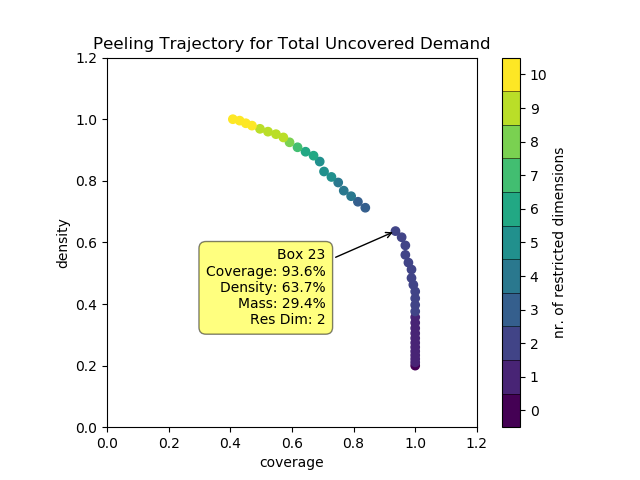

In [19]:
# box1.show_ppt()
# plt.show()

box1.show_tradeoff()
plt.title("Peeling Trajectory for Total Uncovered Demand")
# plt.savefig("{}/{}/Analysis/ScenDisc/Peeling_Traj_TUD".format(case,output_folder),dpi=400,bbox_inches='tight')
plt.show()

coverage       0.936
density     0.636735
mass           0.294
mean        0.636735
res dim            2
Name: 23, dtype: object

                       box 23                                     
                          min        max                 qp values
FL_range             1.003428   2.921317  [1.9349897635842806e-73]
demand_per_affected  8.742985  14.999509   [4.494573972792739e-38]



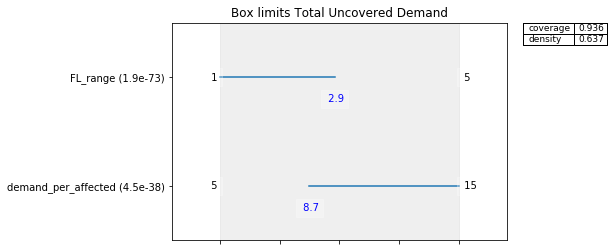

In [85]:
box1.inspect(23)
box1.inspect(23, style="graph")
# box1.inspect(20)
# box1.inspect(20, style="graph")
plt.title("Box limits Total Uncovered Demand")
plt.savefig("{}/Analysis/ScenDisc/Box_Lim_TUD".format(case),dpi=400,bbox_inches='tight')
plt.show()
# box1.inspect(48)

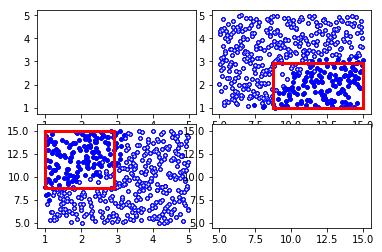

In [86]:

box1.select(23)
fig = box1.show_pairs_scatter()
# fig.set_size_inches((12,12))
# plt.tight_layout()
plt.show()

In [87]:
box2 = prim_obj.find_box()

[MainProcess/INFO] 1765 points remaining, containing 32 cases of interest
C:\Users\timro\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
[MainProcess/INFO] box does not meet threshold criteria, value is 0.256, returning dump box


In [88]:
print (prim_obj.stats_to_dataframe())
print (prim_obj.boxes_to_dataframe())

       coverage   density   mass  res_dim
box 1     0.936  0.636735  0.294        2
box 2     0.064  0.018130  0.706        0
                       box 1             box 2         
                         min      max      min      max
FL_range             1.00343  2.92132  1.00343  4.99231
demand_per_affected  8.74298  14.9995  5.00287  14.9995


## # Uncovered Demand Points

In [20]:
def classify_nr_uncov_DPs(data):
    #get the output 
    result = data['nr_uncovered_DPs']
    #get threshold worst 20%, assuming minimisation
    worst_20 = np.percentile(result, 80)
    
    #make an empty array of length equal to number of cases 
    classes =  np.zeros(result.shape[0])
    
    #if higher than threshold of worst 20%
    classes[result[:] > worst_20] = 1
    
    return classes

In [21]:
prim_obj = prim.setup_prim(results, classify_nr_uncov_DPs, threshold=0.8)

box1 = prim_obj.find_box()

[MainProcess/INFO] 2500 points remaining, containing 434 cases of interest
C:\Users\timro\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
[MainProcess/INFO] mean: 1.0, mass: 0.1056, coverage: 0.6082949308755761, density: 1.0 restricted_dimensions: 2


<IPython.core.display.Javascript object>


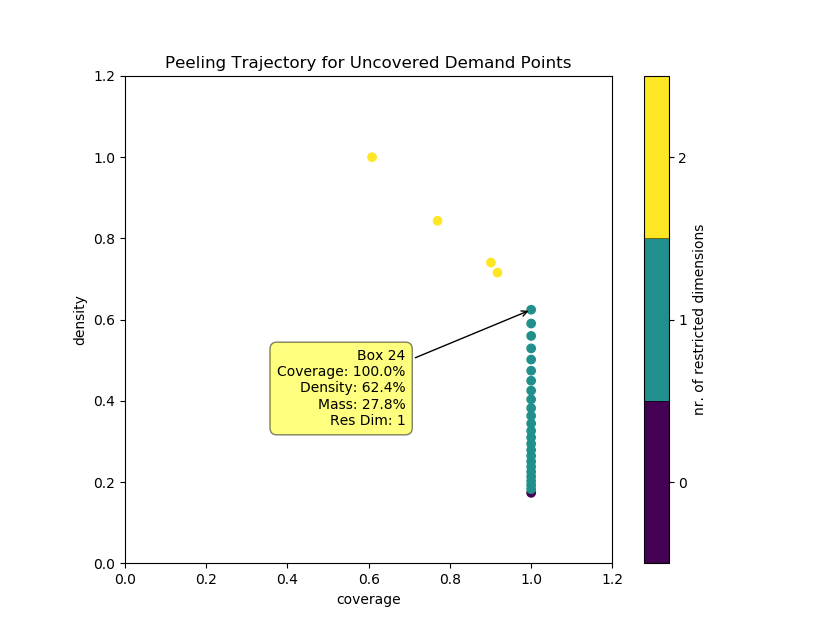

In [22]:
# box1.show_ppt()
# plt.show()

box1.show_tradeoff()
plt.title("Peeling Trajectory for Uncovered Demand Points")
plt.show()

coverage          1
density     0.62446
mass          0.278
mean        0.62446
res dim           1
Name: 24, dtype: object

            box 24                                    
               min       max                 qp values
FL_range  1.003428  2.112009  [4.678370125591552e-154]



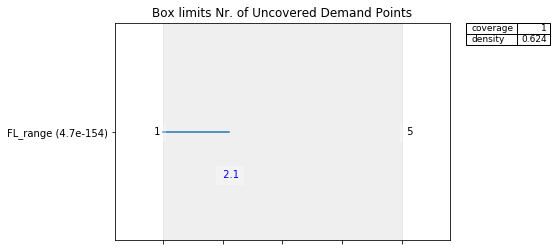

In [93]:
box1.inspect(24)
box1.inspect(24, style="graph")
# box1.inspect(28)
# box1.inspect(28, style="graph")
plt.title("Box limits Nr. of Uncovered Demand Points")
plt.savefig("{}/Analysis/ScenDisc/Box_Lim_NUDPs".format(case),dpi=400,bbox_inches='tight')
plt.show()
# box1.inspect(48)

In [94]:
print("Single dimension can't plot scatter")
box1.select(24)
# fig = box1.show_pairs_scatter()
# # fig.set_size_inches((12,12))
# # plt.tight_layout()
# plt.show()

Single dimension can't plot scatter


In [95]:
box2 = prim_obj.find_box()

[MainProcess/INFO] 1805 points remaining, containing 0 cases of interest
C:\Users\timro\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
[MainProcess/INFO] box does not meet threshold criteria, value is 0.0, returning dump box


In [96]:
print (prim_obj.stats_to_dataframe())
print (prim_obj.boxes_to_dataframe())

       coverage  density   mass  res_dim
box 1       1.0  0.62446  0.278        1
box 2       0.0  0.00000  0.722        0
            box 1             box 2         
              min      max      min      max
FL_range  1.00343  2.11201  1.00343  4.99231
